In [64]:
import pandas as pd
print(pd.__version__)

2.3.3


In [65]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [66]:
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf')]

In [67]:
#한글폰트 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
# font의 파일정보로 font name을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
# matplotlib의 rc(run command) 함수를 사용해서 폰트이름 설정
matplotlib.rc('font', family=font_prop)

Malgun Gothic


In [68]:
data = pd.read_csv('../data/인구현황.csv')
print(data.shape)
print(type(data))

(18, 8)
<class 'pandas.core.frame.DataFrame'>


In [69]:
data= data[data['행정기관'] != '전국']

### 1. 지역별 총인구수 Top5

In [70]:
data_sorted = data.sort_values(by='총인구수', ascending=False)
top5 = data_sorted.head(5)
print(top5[['행정기관', '총인구수']])

     행정기관      총인구수
9     경기도  13694685
1   서울특별시   9331828
2   부산광역시   3266598
16   경상남도   3228380
4   인천광역시   3021010


### 1-1. 지역별 총인구수 plot

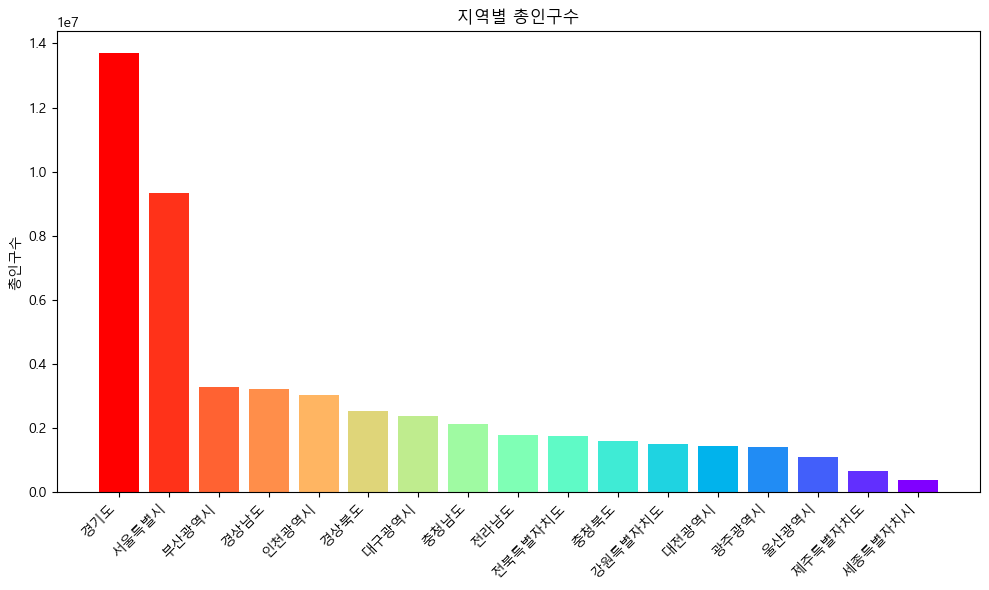

In [71]:
plt.figure(figsize=(10,6))
colors = cm.rainbow_r(np.linspace(0, 1, len(data_sorted)))

plt.bar(
    data_sorted['행정기관'],
    data_sorted['총인구수'],
    color=colors,
)

plt.title('지역별 총인구수')
plt.ylabel('총인구수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 2. 세대당 인구수 높은 지역 Top5

In [72]:
data_sorted_ssp = data.sort_values(by='세대당 인구', ascending=False)
top5_ssp = data_sorted_ssp.head(5).reset_index()
print(top5_ssp[['행정기관', '세대당 인구']])

      행정기관  세대당 인구
0  세종특별자치시    2.39
1      경기도    2.26
2    울산광역시    2.22
3    인천광역시    2.20
4    대구광역시    2.14


### 2-1. 지역별 세대당 인구 Plot

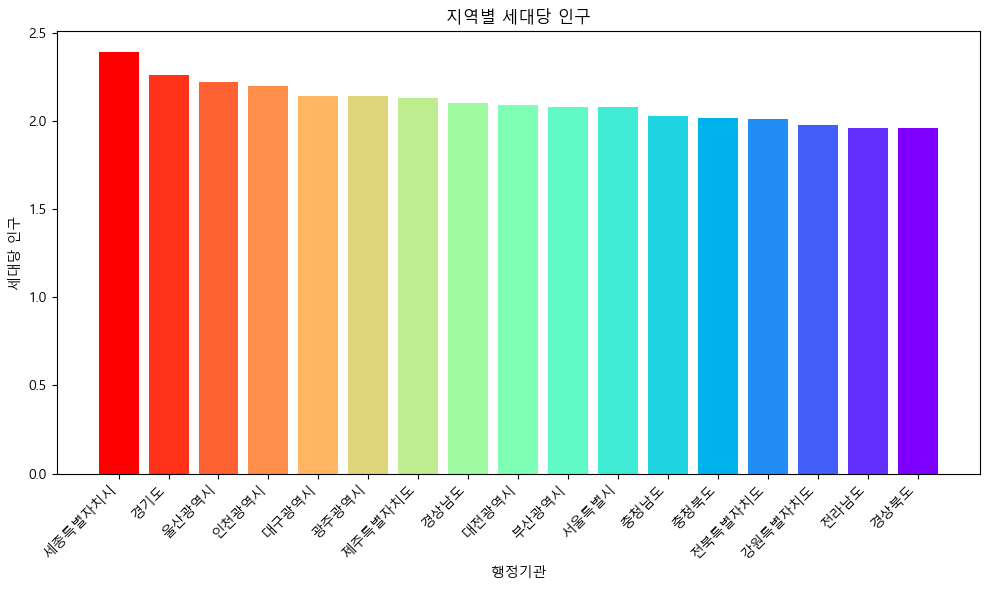

In [73]:
plt.figure(figsize=(10,6))
colors = cm.rainbow_r(np.linspace(0, 1, len(data_sorted)))

plt.bar(
    data_sorted_ssp['행정기관'],
    data_sorted_ssp['세대당 인구'],
    color=colors,
)

plt.title('지역별 세대당 인구')
plt.ylabel('세대당 인구')
plt.xlabel('행정기관')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3. 남녀 비율 분석

In [74]:
data_sorted_mf = data.sort_values(by='남여 비율', ascending=False).reset_index()
print(data_sorted_mf[['행정기관', '남여 비율']])

       행정기관  남여 비율
0     울산광역시   1.06
1      충청남도   1.05
2      충청북도   1.04
3      경상남도   1.02
4      경상북도   1.02
5      전라남도   1.02
6       경기도   1.01
7   강원특별자치도   1.01
8   제주특별자치도   1.00
9     인천광역시   1.00
10  세종특별자치시   0.99
11    대전광역시   0.99
12  전북특별자치도   0.99
13    광주광역시   0.97
14    대구광역시   0.96
15    부산광역시   0.95
16    서울특별시   0.93


### 3-1. 남녀 비율 분석 Plot

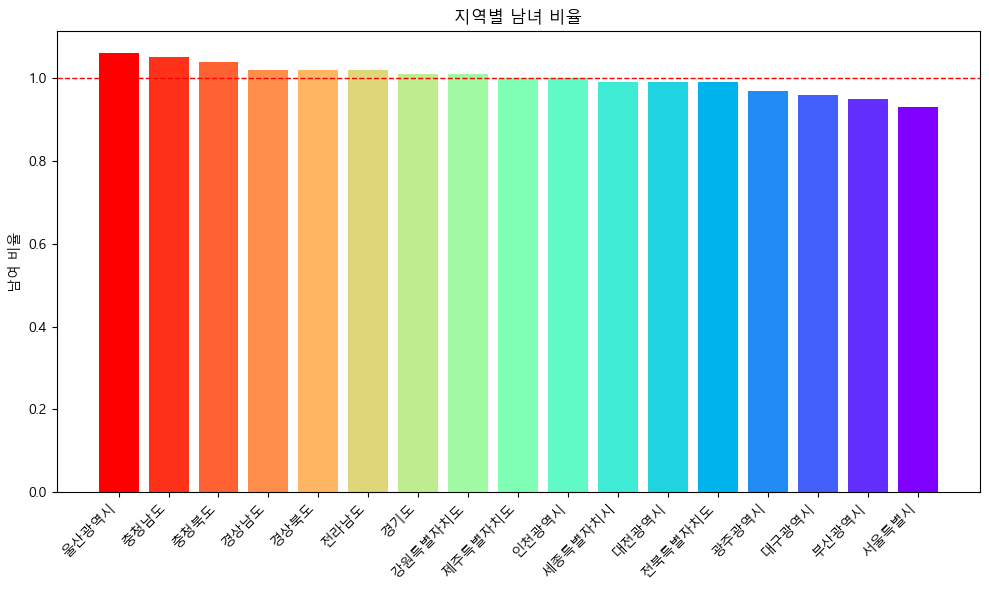

In [75]:
plt.figure(figsize=(10,6))
colors = cm.rainbow_r(np.linspace(0, 1, len(data_sorted)))

plt.bar(
    data_sorted_mf['행정기관'],
    data_sorted_mf['남여 비율'],
    color=colors,
)

plt.axhline(y=1.0, color='r', linestyle='--', linewidth=1)
plt.title('지역별 남녀 비율')
plt.ylabel('남여 비율')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. 남자초과 / 여자초과 분석

In [76]:
data['남초여초'] = data['남여 비율'].apply(lambda x: '남초' if x > 1 else ('여초' if x < 1 else '동일'))
print(data[['행정기관', '남여 비율', '남초여초']])


       행정기관  남여 비율 남초여초
1     서울특별시   0.93   여초
2     부산광역시   0.95   여초
3     대구광역시   0.96   여초
4     인천광역시   1.00   동일
5     광주광역시   0.97   여초
6     대전광역시   0.99   여초
7     울산광역시   1.06   남초
8   세종특별자치시   0.99   여초
9       경기도   1.01   남초
10  강원특별자치도   1.01   남초
11     충청북도   1.04   남초
12     충청남도   1.05   남초
13  전북특별자치도   0.99   여초
14     전라남도   1.02   남초
15     경상북도   1.02   남초
16     경상남도   1.02   남초
17  제주특별자치도   1.00   동일


### 5. 세대당 인구 평균보다 높은 지역

In [77]:
avg_ssp = data['세대당 인구'].mean()
print(f'전국 평균 세대당 인구수: {avg_ssp:.2f}')

high_ssp = data[data['세대당 인구'] > avg_ssp]
high_ssp_sorted = high_ssp.sort_values(by='세대당 인구', ascending=False)
print(high_ssp_sorted[['행정기관', '세대당 인구']].reset_index(drop=True))

전국 평균 세대당 인구수: 2.11
      행정기관  세대당 인구
0  세종특별자치시    2.39
1      경기도    2.26
2    울산광역시    2.22
3    인천광역시    2.20
4    대구광역시    2.14
5    광주광역시    2.14
6  제주특별자치도    2.13


### 5-1. 남초 vs 여초 개수 Plot  ( seaborn의 countplot )

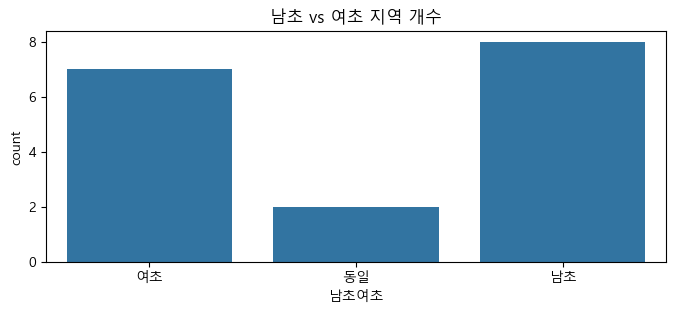

In [78]:
plt.figure(figsize=(8,3))
sns.countplot(data=data, x='남초여초')
plt.title('남초 vs 여초 지역 개수')
plt.xlabel('남초여초')
plt.show()

### 5-1. 지역별 세대수 Plot ( seaborn의 barplot )

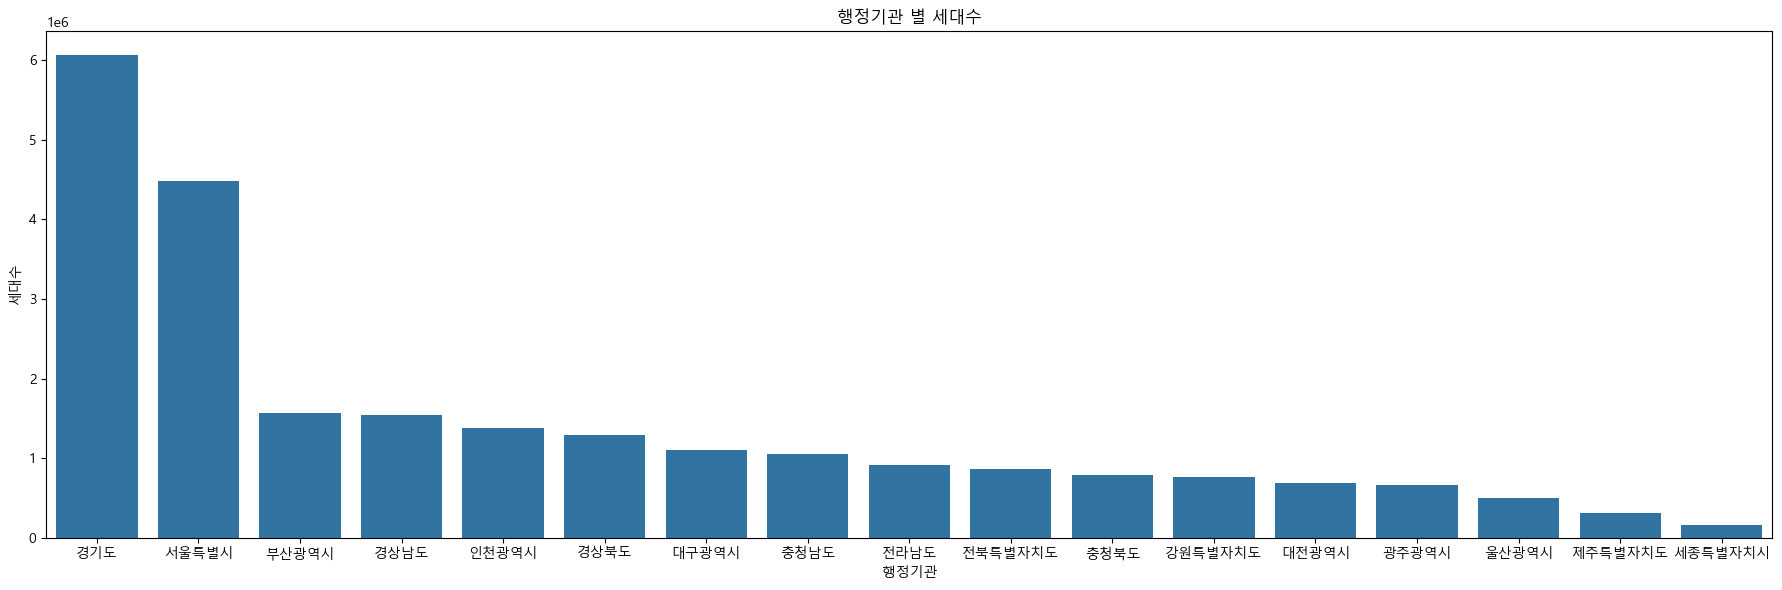

In [79]:
data_sorted_hh = data.sort_values(by='세대수', ascending=False).reset_index()
plt.figure(figsize=(18,6))
sns.barplot(data=data_sorted_hh, x='행정기관', y='세대수')
plt.title('행정기관 별 세대수')
plt.xlabel('행정기관')
plt.tight_layout()


### 6. 남자 인구 vs 여자 인구 비교 Plot ( 선택 )

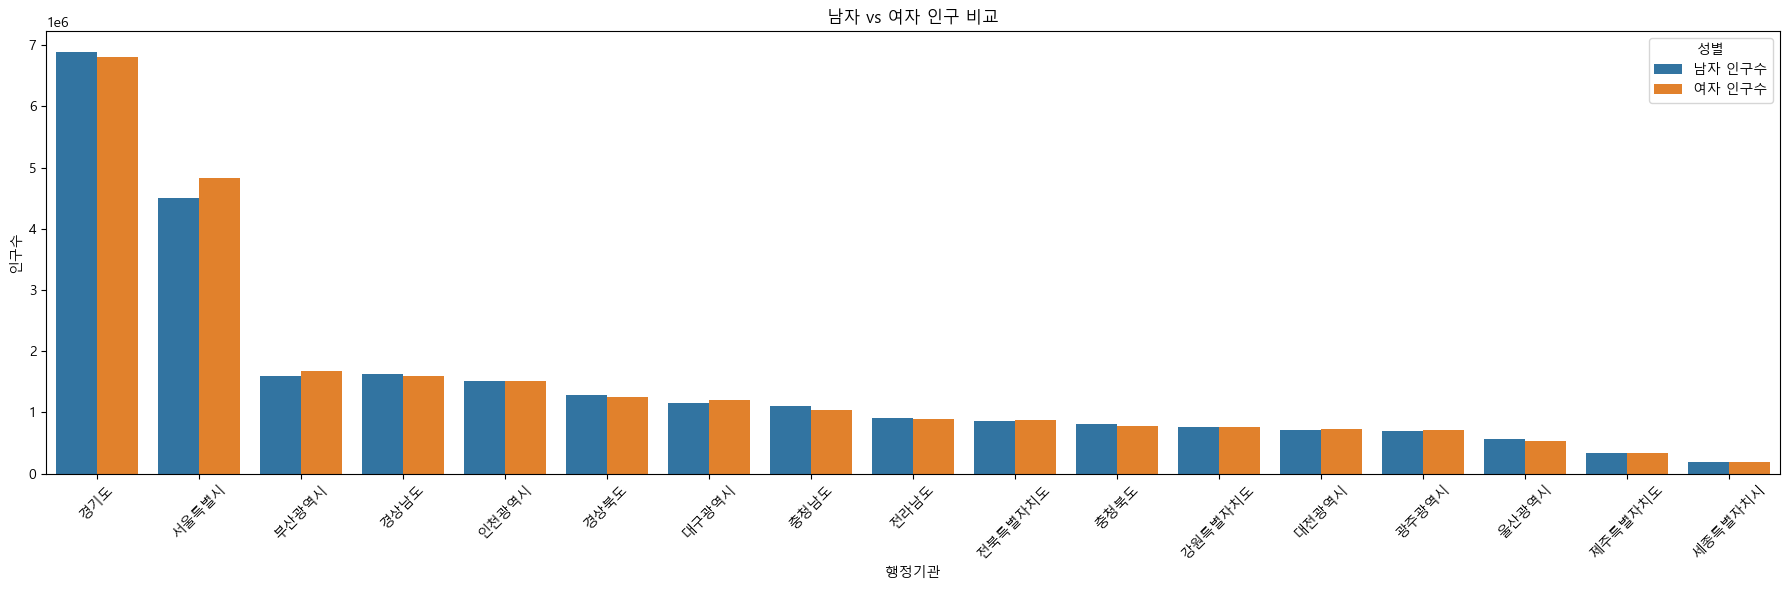

In [80]:
data_long = data_sorted_hh.melt(
    id_vars='행정기관',
    value_vars=['남자 인구수', '여자 인구수'],
    var_name='성별',
    value_name='인구수'
)

plt.figure(figsize=(18,6))

sns.barplot(
    data=data_long,
    x='행정기관',
    y='인구수',
    hue='성별'
)

plt.title('남자 vs 여자 인구 비교')
plt.xlabel('행정기관')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
